## 3-Way ANOVA

The three-way ANOVA is an extension of the two-way ANOVA for assessing whether there is an interaction effect between three independent categorical variables on a continuous outcome variable.

We’ll use the **headache dataset** [datarium package], which contains the measures of migraine headache episode pain score in 72 participants treated with three different treatments. The participants include 36 males and 36 females. Males and females were further subdivided into whether they were at low or high risk of migraine.

We want to understand how each independent variable (type of treatments, risk of migraine and gender) interact to predict the pain score.

In [97]:
import pandas as pd
url = 'https://github.com/kflisikowski/ds/raw/master/headache.csv'
headache = pd.read_csv(url)
# Display the first few rows of the data
print(headache.head(5))

   id gender risk treatment  pain_score
0   1   male  low         X   79.311695
1   2   male  low         X   76.843399
2   3   male  low         X   70.832421
3   4   male  low         X   81.163944
4   5   male  low         X   75.052213


## Descriptive statistics



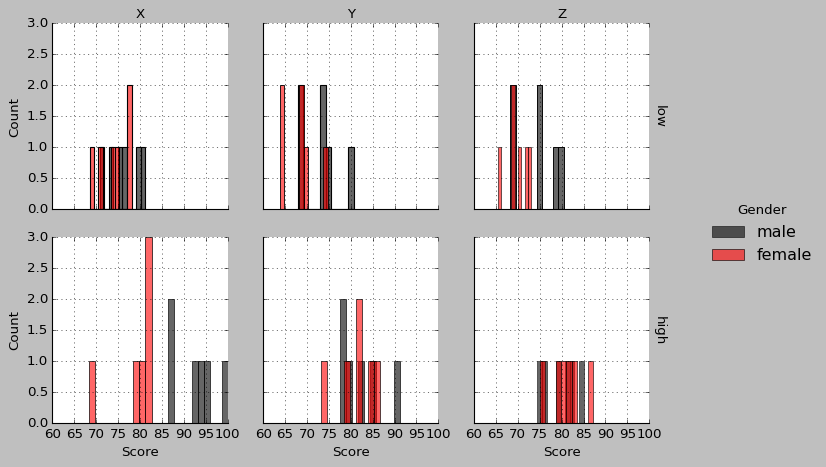

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom colors for hue categories
custom_palette = {"male": "black", "female": "red"}

# Create the FacetGrid plot with hue and palette
g = sns.FacetGrid(headache, col="treatment", row="risk", hue="gender", margin_titles=True, palette=custom_palette)
g.map_dataframe(sns.histplot, x="pain_score", bins=10, alpha=0.6)

# Add titles and labels
g.set_axis_labels("Score", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Add a legend for hue categories
g.add_legend(title="Gender")

# Add grid lines to each subplot
g.map(lambda *args, **kwargs: plt.gca().grid(True))

# Apply a classic theme
plt.style.use('classic')

# Show the plot
plt.show()


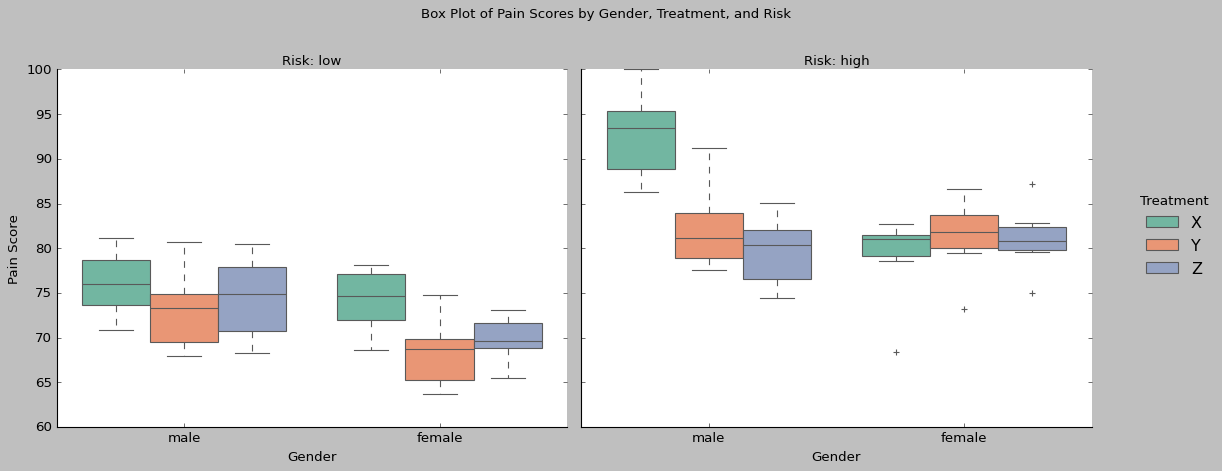

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid for risk levels
g = sns.FacetGrid(headache, col="risk", margin_titles=True, height=6, aspect=1.2)

# Map a box plot to each subplot
g.map_dataframe(
    sns.boxplot, 
    x="gender", 
    y="pain_score", 
    hue="treatment", 
    palette="Set2", 
    dodge=True
)

# Adjust the legend to avoid overlapping
g.add_legend(title="Treatment")

# Add axis labels and titles
g.set_axis_labels("Gender", "Pain Score")
g.set_titles(col_template="Risk: {col_name}")

# Adjust layout
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Box Plot of Pain Scores by Gender, Treatment, and Risk")

# Show the plot
plt.show()


#### As we can observe in the plots we can expect high significance of the risk factor but we cannot say much about gender or treatment

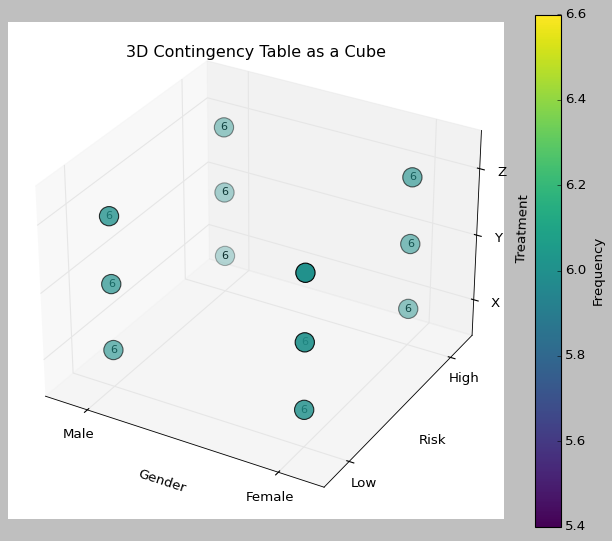

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a three-way contingency table
contingency_table = headache.groupby(["gender", "risk", "treatment"]).size().reset_index(name="Frequency")

# Map actual categories to numerical values for 3D plotting
gender_map = {"male": 0, "female": 1}  # Map gender categories to numerical values
risk_map = {"low": 0, "high": 1}       # Map risk categories to numerical values
treatment_map = {"X": 0, "Y": 1, "Z": 2}  # Map treatment categories to numerical values

# Apply the mappings to the contingency table
contingency_table["X"] = contingency_table["gender"].map(gender_map)
contingency_table["Y"] = contingency_table["risk"].map(risk_map)
contingency_table["Z"] = contingency_table["treatment"].map(treatment_map)

# Plot the cube
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot for the vertices
scatter = ax.scatter(
    contingency_table["X"], 
    contingency_table["Y"], 
    contingency_table["Z"], 
    s=contingency_table["Frequency"] * 50,  # Scale size by frequency
    c=contingency_table["Frequency"],      # Color by frequency
    cmap="viridis", 
    edgecolor="k"
)

# Add text annotations (frequency labels) inside the dots
for i in range(len(contingency_table)):
    ax.text(
        contingency_table["X"].iloc[i], 
        contingency_table["Y"].iloc[i], 
        contingency_table["Z"].iloc[i], 
        str(contingency_table["Frequency"].iloc[i]), 
        color="black", 
        fontsize=10, 
        ha="center", 
        va="center"
    )

# Set categorical axis labels
ax.set_xlabel("Gender")
ax.set_ylabel("Risk")
ax.set_zlabel("Treatment")

# Set ticks for categorical axes (discrete values)
ax.set_xticks([0, 1])  # Gender: 0 = Male, 1 = Female
ax.set_xticklabels(["Male", "Female"])

ax.set_yticks([0, 1])  # Risk: 0 = Low, 1 = High
ax.set_yticklabels(["Low", "High"])

ax.set_zticks([0, 1, 2])  # Treatment: 0 = X, 1 = Y, 2 = Z
ax.set_zticklabels(["X", "Y", "Z"])

# Add legend and color bar
plt.colorbar(scatter, label="Frequency")
plt.title("3D Contingency Table as a Cube")

# Show the plot
plt.show()



## Assumptions

### Outliers

#### We can se that our thata is evenly distributed

In [101]:
from tabulate import tabulate

# Assuming summary_stats is your result
summary_stats = headache.groupby(['gender', 'risk', 'treatment'])['pain_score'].agg(['mean', 'std']).reset_index()

# Print the table using tabulate for better formatting
print(tabulate(summary_stats, headers='keys', tablefmt='pretty', showindex=False))


+--------+------+-----------+-------------------+--------------------+
| gender | risk | treatment |       mean        |        std         |
+--------+------+-----------+-------------------+--------------------+
| female | high |     X     | 78.86505855324262 | 5.316488578939095  |
| female | high |     Y     |  81.175303581571  | 4.619386946743762  |
| female | high |     Z     | 81.03514189897527 | 3.9848858402484963 |
| female | low  |     X     | 74.15623059028626 | 3.6902716678224445 |
| female | low  |     Y     | 68.36192528540202 | 4.081841997421537  |
| female | low  |     Z     | 69.77955539566078 | 2.7196450898290885 |
|  male  | high |     X     | 92.73884697815193 | 5.1160947047811876 |
|  male  | high |     Y     | 82.34154183119297 | 5.000898177947677  |
|  male  | high |     Z     | 79.68073595313386 | 4.045884608054915  |
|  male  | low  |     X     | 76.05178286344325 | 3.8548761779636753 |
|  male  | low  |     Y     | 73.13877237139839 | 4.765060880615272  |
|  mal

#### Computed statistics for our data


In [102]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Function to identify outliers using the IQR method and calculate t-statistic and p-value
def identify_outliers(group):
    # Calculate the 1st (Q1) and 3rd (Q3) quartiles and IQR (Interquartile Range)
    Q1 = group['pain_score'].quantile(0.25)
    Q3 = group['pain_score'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = group[(group['pain_score'] < lower_bound) | (group['pain_score'] > upper_bound)]
    
    # Calculate expected mean and standard deviation for the group
    mean = group['pain_score'].mean()
    std = group['pain_score'].std()
    outliers['Deviations away'] = (outliers['pain_score'] - mean) / std
    
    return outliers


outliers = headache.groupby(['gender', 'treatment', 'risk']).apply(identify_outliers).reset_index(drop=True)
print(outliers)


   id  gender  risk treatment  pain_score  Deviations away
0  57  female  high         X   68.360185        -1.975905
1  62  female  high         Y   73.144392        -1.738523
2  67  female  high         Z   74.988057        -1.517505
3  71  female  high         Z   87.142265         1.532572


C:\Users\mgodl\AppData\Local\Temp\ipykernel_42332\3779876630.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = headache.groupby(['gender', 'treatment', 'risk']).apply(identify_outliers).reset_index(drop=True)


#### We can observe one significant outlier and i decided to remove it

In [103]:
headache = headache[headache['id'] != 57]

### Normality

In [104]:
from scipy.stats import shapiro

# Function to perform the Shapiro-Wilk test
def shapiro_test(group):
    stat, p_value = shapiro(group['pain_score'])
    return pd.Series({'W': stat, 'p_value': p_value})

# Group the data by gender and education level and apply the Shapiro-Wilk test
shapiro_results = headache.groupby(['gender', 'treatment', 'risk']).apply(shapiro_test).reset_index()

# Display the Shapiro-Wilk test results
print(shapiro_results)

    gender treatment  risk         W   p_value
0   female         X  high  0.921949  0.542589
1   female         X   low  0.932551  0.599938
2   female         Y  high  0.939332  0.653824
3   female         Y   low  0.926774  0.555428
4   female         Z  high  0.971232  0.900604
5   female         Z   low  0.957585  0.800946
6     male         X  high  0.958434  0.807595
7     male         X   low  0.982194  0.961928
8     male         Y  high  0.901730  0.384257
9     male         Y   low  0.920272  0.507324
10    male         Z  high  0.955478  0.784303
11    male         Z   low  0.924051  0.535007


C:\Users\mgodl\AppData\Local\Temp\ipykernel_42332\3527663510.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shapiro_results = headache.groupby(['gender', 'treatment', 'risk']).apply(shapiro_test).reset_index()


#### The score were normally distributed (p > 0.05) for each cell, as assessed by Shapiro-Wilk’s test of normality.

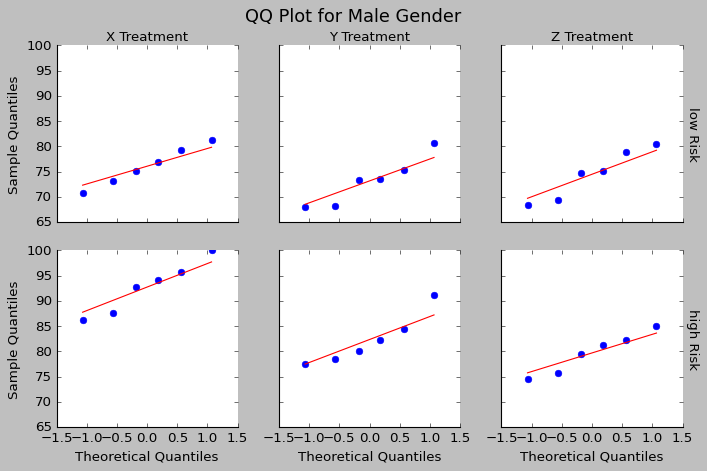

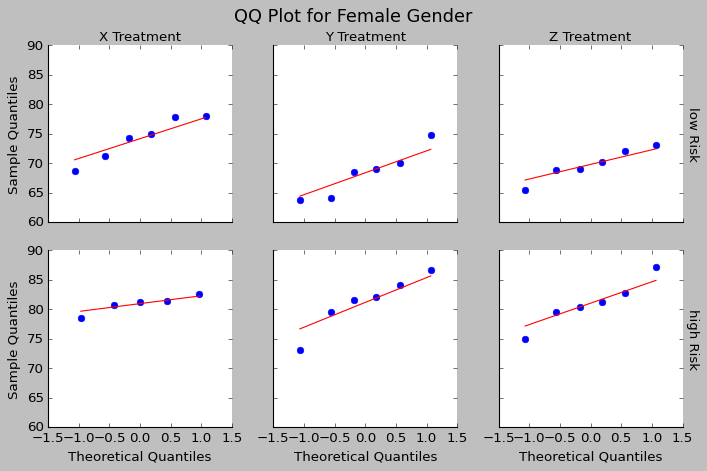

In [105]:

# Function to create QQ plot
def qqplot(x, **kwargs):
    ax = plt.gca()
    sm.qqplot(x, line='s', ax=ax)
    ax.get_lines()[1].set_color('red')  # Set the line of best fit to red

# Split the dataset by gender
for gender in headache['gender'].unique():
    gender_data = headache[headache['gender'] == gender]
    
    # Create a FacetGrid for the QQ plots for the current gender
    g = sns.FacetGrid(gender_data, col="treatment", row="risk", hue="gender", margin_titles=True, height=3)
    
    # Map the QQ plot function to the FacetGrid
    g.map(qqplot, 'pain_score')
    
    # Add titles and labels for each plot
    g.set_axis_labels("Theoretical Quantiles", "Sample Quantiles")
    g.set_titles(col_template="{col_name} Treatment", row_template="{row_name} Risk")
    
    # Add a main title for the entire grid
    g.fig.suptitle(f"QQ Plot for {gender.capitalize()} Gender", fontsize=16)
    
    # Adjust layout to prevent overlapping
    g.fig.tight_layout()
    g.fig.subplots_adjust(top=0.9)  # Adjust the title's position
    
    # Show the plot
    plt.show()


#### All of the thata falls more or less into our line so we can procead


### Homogeneity of variance



In [106]:
from scipy.stats import levene

# Perform Levene's test
# Group the data by gender and education level and extract the score values
grouped_data = headache.groupby(['gender', 'treatment', 'risk'])['pain_score'].apply(list)

# Perform Levene's test
stat, p_value = levene(*grouped_data)

# Display the results
print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")

Levene's test statistic: 0.5246834139672604
p-value: 0.8789150097324341


#### p value is much greates then 0.05 so the variances are similar

## Anova




In [107]:
# Perform ANOVA
model = smf.ols('pain_score ~ gender * treatment * risk', data=headache).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Display ANOVA 
anova_results['Siginificant'] = anova_results['PR(>F)'] < 0.05
print(anova_results[['sum_sq', 'df', 'PR(>F)', 'Siginificant']])

                            sum_sq    df        PR(>F)  Siginificant
gender                  242.674384   1.0  4.304222e-04          True
treatment               369.786595   2.0  1.161021e-04          True
risk                   1912.384094   1.0  4.406135e-15          True
gender:treatment         76.165715   2.0  1.215319e-01         False
gender:risk               0.027916   1.0  9.682136e-01         False
treatment:risk           44.589684   2.0  2.859227e-01         False
gender:treatment:risk   213.452926   2.0  3.835845e-03          True
Residual               1028.470017  59.0           NaN         False


#### We can observe that all of our 3 variables are significant on their owen, as well as when we applay all of them at one. When we use 2 varibles combined they lose their significance. Our residual is quite high so we can se that there are more factors involved


## Post-hoc tests

### Two-way interactions

In [108]:
# Function to perform ANOVA test within each group
def group_anova(group):
    model = smf.ols('pain_score ~ risk', data=group).fit()
    return anova_lm(model, typ=2)

# Group the data by gender and treatment, and apply the ANOVA test
anova_results = headache.groupby(['gender', 'treatment']).apply(group_anova).reset_index()

# Replace False with NaN in the 'Significant' column
anova_results['Significant'] = anova_results['PR(>F)'].apply(
    lambda x: True if pd.notna(x) and x < 0.05 else (np.nan if pd.isna(x) else False)
)

# Print the desired columns
print(anova_results[['gender', 'treatment', 'level_2', 'sum_sq', 'df', 'PR(>F)', 'Significant']])


    gender treatment   level_2      sum_sq    df    PR(>F) Significant
0   female         X      risk  126.472947   1.0  0.003936        True
1   female         X  Residual   76.992925   9.0       NaN         NaN
2   female         Y      risk  492.547990   1.0  0.000470        True
3   female         Y  Residual  190.000849  10.0       NaN         NaN
4   female         Z      risk  380.064683   1.0  0.000194        True
5   female         Z  Residual  116.378923  10.0       NaN         NaN
6     male         X      risk  835.374326   1.0  0.000080        True
7     male         X  Residual  205.172477  10.0       NaN         NaN
8     male         Y      risk  254.072897   1.0  0.008525        True
9     male         Y  Residual  238.573939  10.0       NaN         NaN
10    male         Z      risk   81.897903   1.0  0.071362       False
11    male         Z  Residual  201.350905  10.0       NaN         NaN


C:\Users\mgodl\AppData\Local\Temp\ipykernel_42332\2990178032.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  anova_results = headache.groupby(['gender', 'treatment']).apply(group_anova).reset_index()


#### The analysis shows that the risk factor is significant for most groups, with p-values below 0.05 for all treatments except for the Male and Z treatment, which has a p-value of 0.071. This result is close to being significant, but technically it is not. Overall, the risk factor appears to have a significant effect across most treatments.


### Main effects


In [109]:
# Function to perform ANOVA test within each group
def group_anova(group):
    model = smf.ols('pain_score ~ treatment', data=group).fit()
    return anova_lm(model, typ=2)

# Group the data by gender and treatment, and apply the ANOVA test
anova_results = headache.groupby(['gender']).apply(group_anova).reset_index()

# Replace False with NaN in the 'Significant' column
anova_results['Significant'] = anova_results['PR(>F)'].apply(
    lambda x: True if pd.notna(x) and x < 0.05 else (np.nan if pd.isna(x) else False)
)

# Print the desired columns
print(anova_results[['gender', 'level_1', 'sum_sq', 'df', 'PR(>F)', 'Significant']])


   gender    level_1       sum_sq    df    PR(>F) Significant
0  female  treatment    37.757702   2.0  0.649774       False
1  female   Residual  1382.458316  32.0       NaN         NaN
2    male  treatment   393.710706   2.0  0.039281        True
3    male   Residual  1816.442447  33.0       NaN         NaN


C:\Users\mgodl\AppData\Local\Temp\ipykernel_42332\3853184917.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  anova_results = headache.groupby(['gender']).apply(group_anova).reset_index()


In [110]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Function to perform pairwise comparisons within each group
def pairwise_comparisons(group, gender):
    tukey = pairwise_tukeyhsd(endog=group['pain_score'], groups=group['treatment'], alpha=0.05)
    results = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
    results['gender'] = gender
    return results

# Group the data by gender and apply the pairwise comparisons
pwc_results = pd.concat([pairwise_comparisons(group, gender) for gender, group in headache.groupby('gender')]).reset_index(drop=True)

# Display the results
print(pwc_results)

  group1 group2  meandiff   p-adj    lower   upper  reject  gender
0      X      Y   -2.4830  0.6411  -9.2251  4.2592   False  female
1      X      Z   -1.8442  0.7812  -8.5864  4.8979   False  female
2      Y      Z    0.6387  0.9693  -5.9552  7.2327   False  female
3      X      Y   -6.6552  0.0865 -14.0873  0.7770   False    male
4      X      Z   -7.3270  0.0540 -14.7592  0.1052   False    male
5      Y      Z   -0.6719  0.9733  -8.1040  6.7603   False    male


#### The Comparisons between treatments for male and females are insignificant

In [111]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Function to perform pairwise comparisons within each group
def pairwise_comparisons(group, gender):
    tukey = pairwise_tukeyhsd(endog=group['pain_score'], groups=group['risk'], alpha=0.05)
    results = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
    results['gender'] = gender
    return results

# Group the data by gender and apply the pairwise comparisons
pwc_results = pd.concat([pairwise_comparisons(group, gender) for gender, group in headache.groupby('gender')]).reset_index(drop=True)

# Display the results
print(pwc_results)

  group1 group2  meandiff  p-adj    lower   upper  reject  gender
0   high    low  -10.2984    0.0 -12.9578 -7.6389    True  female
1   high    low  -10.3716    0.0 -14.4659 -6.2773    True    male


#### The risk factor for both genders is significant

In [112]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Function to perform pairwise comparisons within each group
def pairwise_comparisons(group, gender):
    tukey = pairwise_tukeyhsd(endog=group['pain_score'], groups=group['risk'], alpha=0.05)
    results = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
    results['treatment'] = gender
    return results

# Group the data by gender and apply the pairwise comparisons
pwc_results = pd.concat([pairwise_comparisons(group, gender) for gender, group in headache.groupby('treatment')]).reset_index(drop=True)

# Display the results
print(pwc_results)

  group1 group2  meandiff   p-adj    lower   upper  reject treatment
0   high    low  -12.2836  0.0000 -17.1903 -7.3768    True         X
1   high    low  -11.0081  0.0000 -15.0488 -6.9673    True         Y
2   high    low   -8.2402  0.0001 -11.7996 -4.6808    True         Z


#### The risk factor for all tests is significant

### Pairwise comparisons

In [114]:
import pingouin as pg
# Perform pairwise t-tests with Bonferroni correction
pairwise_results = pg.pairwise_tests(dv='pain_score', between=['treatment'], data=headache, padjust='bonferroni')

# Display the results
print(pairwise_results)

    Contrast  A  B  Paired  Parametric         T        dof alternative  \
0  treatment  X  Y   False        True  2.059472  43.638339   two-sided   
1  treatment  X  Z   False        True  2.239924  39.365523   two-sided   
2  treatment  Y  Z   False        True  0.008648  46.000000   two-sided   

      p-unc    p-corr    p-adjust   BF10    hedges  
0  0.045446  0.136339  bonferroni  1.566  0.592593  
1  0.030813  0.092439  bonferroni  2.111  0.647379  
2  0.993137  1.000000  bonferroni  0.287  0.002456  


#### There is significat difrence between treatment X and the rest[ Y, Z].

### Summory


In the end we can see that the each varible is significatn on their own, especially risk factor and we can see that treatment X perform much worse compered with Y and Z.